## Logistic Regression - Heart Data

In [1]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

###  Data Gathering

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###  EDA + Feature Engineering

In [5]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

####  age

In [6]:
df['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

<Axes: >

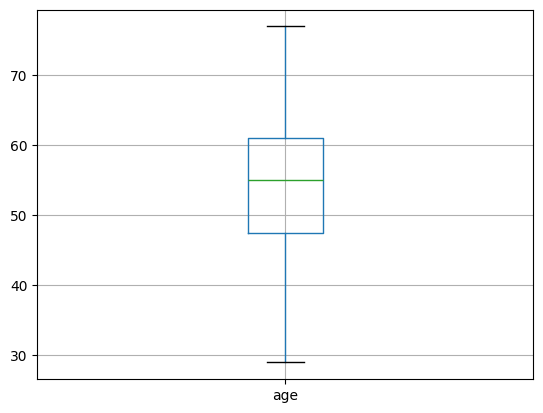

In [7]:
df[['age']].boxplot()

In [8]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = df['age'], y = df['target'])

<Axes: xlabel='age', ylabel='target'>

### train test split

In [9]:
df.shape

(303, 14)

In [10]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [11]:
165/303

0.5445544554455446

In [12]:
x = df.drop('target', axis = 1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=10,stratify = y)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2


In [13]:
124/227

0.5462555066079295

### Model Training

In [14]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

### Evaluation

In [15]:
y_pred = log_reg.predict(x_test)
y_pred[30:35]

array([1, 0, 1, 1, 0], dtype=int64)

In [16]:
y_test[30:35] # y_actual

67     1
219    0
290    0
68     1
276    0
Name: target, dtype: int64

#### TEsting Data Evaluation

In [17]:
confusion_matrix(y_test, y_pred)

array([[29,  6],
       [ 4, 37]], dtype=int64)

In [18]:
TN = 29
FP = 6
FN = 4
TP = 37

In [19]:
acc = ( TP + TN)/76
acc

0.868421052631579

In [20]:
P = TP/(TP+FP)
P

0.8604651162790697

In [21]:
R = TP/(TP+FN)
R

0.9024390243902439

In [22]:
f1 = (2 * P * R)/(P + R)
f1

0.8809523809523809

In [23]:
y_test.value_counts()

target
1    41
0    35
Name: count, dtype: int64

In [24]:
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [25]:
accuracy_score(y_test, y_pred)

0.868421052631579

In [26]:
TN = 29
FP = 6
FN = 4
TP = 37

In [27]:
R = 29/(35)
R

0.8285714285714286

### Training Data Evaluation

In [28]:
y_pred_train = log_reg.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("COnfusion Matrix\n",cnf_matrix )

print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print('Accuracy :',acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

COnfusion Matrix
 [[ 78  25]
 [ 11 113]]
**************************************************
Accuracy : 0.8414096916299559
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.76      0.81       103
           1       0.82      0.91      0.86       124

    accuracy                           0.84       227
   macro avg       0.85      0.83      0.84       227
weighted avg       0.84      0.84      0.84       227



#### Testing Data Evaluation

In [29]:
y_pred = log_reg.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("COnfusion Matrix\n",cnf_matrix )

print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy :',acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

COnfusion Matrix
 [[29  6]
 [ 4 37]]
**************************************************
Accuracy : 0.868421052631579
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



In [30]:
x_train.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3


In [31]:
log_reg.predict_proba(x_train)[10:15]

array([[0.99017761, 0.00982239],
       [0.07949674, 0.92050326],
       [0.77805585, 0.22194415],
       [0.05157508, 0.94842492],
       [0.53577883, 0.46422117]])

In [32]:
y_train_prob = log_reg.predict_proba(x_train)[:,1]
# y_train_prob

In [33]:
log_reg.predict(x_train)[10:15]

array([0, 1, 0, 1, 0], dtype=int64)

### ROC Curve

In [34]:
fpr, tpr, threshold = roc_curve(y_train, y_train_prob)
threshold

array([       inf, 0.99404992, 0.95079441, 0.94958803, 0.93500445,
       0.93304436, 0.89700531, 0.89222722, 0.8755893 , 0.87459716,
       0.86121078, 0.85405913, 0.77417934, 0.77111477, 0.74909795,
       0.74586646, 0.74205082, 0.74113342, 0.72375501, 0.72096178,
       0.71827604, 0.70677535, 0.70344403, 0.70254857, 0.69444199,
       0.69005645, 0.68432664, 0.68080333, 0.67808027, 0.67313116,
       0.63013351, 0.62606347, 0.59968733, 0.59525973, 0.59446125,
       0.57916613, 0.57772455, 0.54012256, 0.53790658, 0.53283723,
       0.51829005, 0.46979435, 0.4400686 , 0.43797375, 0.43459416,
       0.40341393, 0.36152148, 0.25935683, 0.25872256, 0.24855471,
       0.22194415, 0.13244545, 0.11806923, 0.09008914, 0.08430292,
       0.07778462, 0.05753897, 0.00230334])

In [35]:
fpr[42]

0.2912621359223301

In [36]:
tpr[42]

0.9354838709677419

In [37]:
np.where(threshold < 0.51799)

(array([41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57],
       dtype=int64),)

In [38]:
threshold[42]

0.4400685985195351

In [39]:
Th = 1
TPR >> 0
FPR >> 0 

Th = 0.05 == 0
TPR >> 1
FPR >> 1


NameError: name 'TPR' is not defined

In [ ]:
[[ 78  25]
 [ 11 113]]
TH = 0.5
TPR = 0.91 >> Recall
FPR = 

In [ ]:
TPR = 113/(113+11)
TPR 

In [ ]:
FPR = 25/(25+78)
FPR

In [ ]:
fpr, tpr, threshold = roc_curve(y_train, y_train_prob)

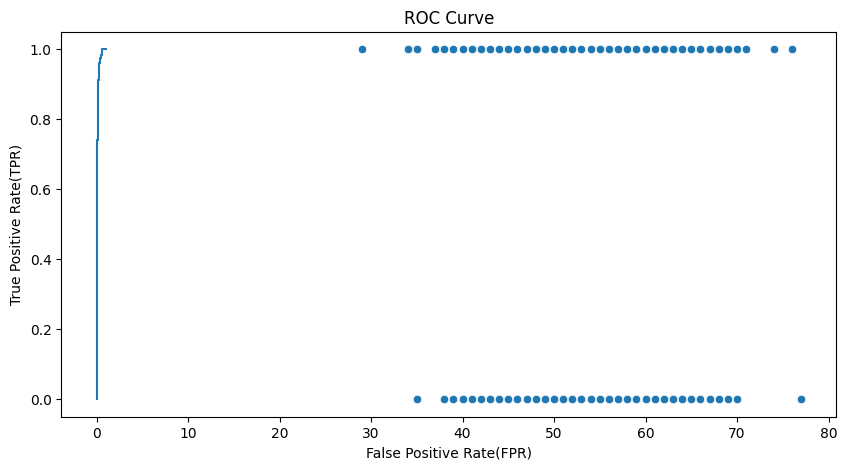

In [40]:
# plt.figure(figsize = (8,6))
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.savefig('ROC_Curve.jpg')
plt.show()

In [41]:
!pip install plotly

In [ ]:
import plotly.express as px
fig  = px.line(x =fpr,y = tpr,title='ROC Curve',
        labels={'x':'False Positive Rate(FPR)', 'y':"True Positive Rate(TPR)"},
        width=800, height=500)
fig.show()
fig.write_html("ROC.html")